In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

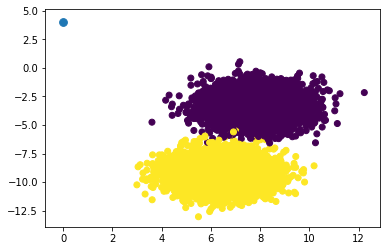

In [87]:
X,y = make_blobs(centers=2,random_state=6,n_samples=10000)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)
plt.scatter(X[:,0],X[:,1],c=y)
point = np.array([0,4])
plt.scatter(point[0],point[1],s=60)

In [88]:
class customKNN:
    def __init__(self,n_neighbours=5):
        self.neighbours = n_neighbours
    
    def fit(self,X,y):
        self.__X = X
        self.__y = y
    
    def predict_points(self,point):
        distance = np.sqrt(((X-point)**2).sum(axis=1))
        distance_index = distance.argsort()
        near_index = distance_index[:self.neighbours]
        
        vote = self.__y[near_index]
        values,count = np.unique(vote,return_counts = True)
        return values[count.argmax()]
    
    def predict(self,X):
        result = []
        
        for i in X:
            result.append(self.predict_points(i))
            
        return np.array(result)
    
    
    def score(self,X,y):
        yp = self.predict(X)
        
        return np.mean(yp == y)

In [51]:
model = customKNN()

In [52]:
model.fit(X,y)

In [53]:
model.predict(X)

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [54]:
y

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [55]:
model.score(X,y)

1.0

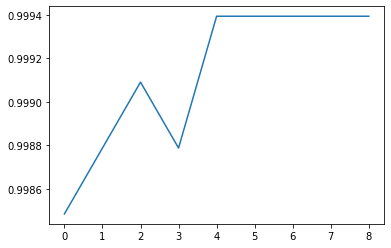

In [94]:
result = []
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,10):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    result.append(model.score(X_test,y_test))
    
    
# result
plt.plot(result)


In [93]:
X_train.shape,y_test.shape

((6700, 2), (3300,))